<a href="https://colab.research.google.com/github/nhareesha/MLAI/blob/ML/NN/DigitRecognitionWithTFOptimized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

Load data from MINST dataset

In [2]:
# Load digit classification dataset from Keras library
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

# Data Exploration before flattening
print("Sample from x_train:", x_train[0]) # return the 1st sample
print("Sample from y_train:", y_train[0])

11490434/11490434 [==============================] - 0s 0us/step
Sample from x_train: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39

In [4]:
# Flatten
x_train_flatten = x_train.reshape(x_train.shape[0], -1)
print(f"Flattened x_train dimensions - {x_train_flatten.shape}")

Flattened x_train dimensions - (60000, 784)


In [5]:
# Normalization
normalization_layer = tf.keras.layers.Normalization(axis=-1) # normalizes along the last(or right most) dimension which is columns
normalization_layer.adapt(x_train_flatten)  # learns mean, variance
Xn_train = normalization_layer(x_train_flatten)

print(f"1st instance of Xn_train - {Xn_train[0]}")

1st instance of Xn_train - [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.41810582e-03 -5.75485127e-03 -4.08253865e-03 -4.08254098e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.08252655e-03 -4.70970897e-03 -8.79932940e-03 -1.15905553e-02
 -1.47589752e-02 -1.92848425e-02 -2.46718246e-02 -2.90710572e-02
 -3.05926725e-02 -3.11640147e-02 -3.19629647e-02 -3.02025899e-02
 -3.13101709e-02 -2.83834040e-02 -2.31191888e-02 -1.91666111e-02
 -1.67722348e-02 -1.09963380e-02 -8.32486618e-03 -4.38072998e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.08253120e-03 -5.39536821e-0

Digit classification

In the final output layer `'linear'` action is used instead of Softmax activation.

More stable and accurate results can be obtained if the **softmax** and **loss are combined during training**. This is enabled by the 'preferred' organization, by including softmax operation directly in the loss function.

In the preferred organization the final layer has a linear activation. For historical reasons, the `outputs in this form are referred` to as `logits`.

 The loss function has an additional argument: `from_logits = True`. This informs the loss function that the softmax operation should be included in the loss calculation. This allows for an optimized implementation.

Adam optimizer(Adaptive Moment Estimation)

In [6]:
tf.random.set_seed(1234)

preferred_model = Sequential(
    [
        Dense(units = 50, activation = 'relu', name = 'l1'),
        Dense(units = 30, activation = 'relu', name = 'l2'),
        Dense(units = 20, activation = 'relu', name = 'l3'),
        Dense(units = 10, activation = 'relu', name = 'linear') # Output is linear layer
    ]
)


preferred_model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001) # for learning rate
    )

#  Train a model using the fit method
preferred_model.fit(
    Xn_train,
    y_train,
    epochs = 10
    )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3004
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1376
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1010
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0824
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0690
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0607
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0525
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0462
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0428
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0421


### Output Handling
Notice that in the preferred model, the outputs are not probabilities, but can range from large negative numbers to large positive numbers, because of linear action model at the output layer.

The output must be sent through a softmax when performing a prediction that expects a probability.

Again predecting on training data, only is done rarely. However, when done it is for debugging or model evaluation or for checking overfitting.

In [7]:
y_train_predicted_pref_linear = preferred_model.predict(Xn_train)

print(f"y_train_predicted_pref sample : {y_train_predicted_pref_linear[0]}")

1875/1875 [==============================] - 7s 3ms/step
y_train_predicted_pref sample : [ 0.         0.         0.        15.739293   0.        22.703579
  5.6971693  4.2797427  0.         1.9786556]


In [8]:
y_train_pref = tf.nn.softmax(y_train_predicted_pref_linear).numpy()

print(f"y_train_pref : {y_train_pref[0]}")

# First 100 predictions
for i in range(100):
  print(f"{y_train_pref[i]} : predicted digit : {np.argmax(y_train_pref[i])}", f"Actual digit : {y_train[i]}")

y_train_pref : [1.3789569e-10 1.3789569e-10 1.3789569e-10 9.4414531e-04 1.3789569e-10
 9.9905580e-01 4.1096072e-08 9.9590878e-09 1.3789569e-10 9.9740061e-10]
[1.3789569e-10 1.3789569e-10 1.3789569e-10 9.4414531e-04 1.3789569e-10
 9.9905580e-01 4.1096072e-08 9.9590878e-09 1.3789569e-10 9.9740061e-10] : predicted digit : 5 Actual digit : 5
[9.9999994e-01 1.1975182e-09 1.1975182e-09 6.1714394e-09 1.1975182e-09
 6.5583832e-09 2.5333733e-08 1.3457666e-09 5.8247749e-09 1.8184100e-09] : predicted digit : 0 Actual digit : 0
[2.3743369e-06 2.3743369e-06 4.0537630e-06 2.3743369e-06 9.9987882e-01
 1.8726381e-05 2.3743369e-06 1.1633054e-05 2.3743369e-06 7.4730211e-05] : predicted digit : 4 Actual digit : 4
[1.0137516e-07 9.9999720e-01 1.0137516e-07 1.0137516e-07 5.9420165e-07
 1.0137516e-07 1.0137516e-07 1.3384171e-06 1.7490419e-07 1.0137516e-07] : predicted digit : 1 Actual digit : 1
[2.2396381e-10 2.2396381e-10 2.2396381e-10 2.7899288e-10 7.5776761e-08
 2.7998068e-10 2.2396381e-10 1.8984757e-08 

Prediction on test set.

####Note - `.numpy()`

`.numpy()` converts TF's tensor type to numpy array.


In [ ]:

#Flatten
x_test_flatten = x_test.reshape(x_test.shape[0], -1)
# Normalize x_test from the learned mean and variance.(ZScore)
Xn_test = normalization_layer(x_test_flatten)

#Predict
yn_test_linear = preferred_model.predict(Xn_test)


In [17]:
# Softmax outputs the probabilities
yn_test_pref = tf.nn.softmax(yn_test_linear).numpy()

# Sample y_test - digits
for i in range(10):
  print(f"{y_test[i]} --> digit is {np.argmax(y_test[i])}")

# Sample yn_test_pref has softmax probabilities
for i in range(10):
  print(f"{yn_test_pref[i]} --> digit is {np.argmax(yn_test_pref[i])}")

# Converts the row vector to a scalar that hosts the index of largest probability of the vector.
yn_test_pref_digits = np.argmax(yn_test_pref, axis = -1)
print(f"{yn_test_pref_digits}")

7 --> digit is 0
2 --> digit is 0
1 --> digit is 0
0 --> digit is 0
4 --> digit is 0
1 --> digit is 0
4 --> digit is 0
9 --> digit is 0
5 --> digit is 0
9 --> digit is 0
[2.6585245e-09 2.6585245e-09 2.0793072e-08 6.5844915e-06 2.6585245e-09
 9.2552828e-09 2.6585245e-09 9.9999267e-01 2.6585245e-09 6.8195061e-07] --> digit is 7
[3.1910599e-09 3.8795901e-07 9.9999923e-01 3.2218669e-08 1.0517461e-09
 1.0517461e-09 1.0205238e-08 1.4992448e-08 2.9516733e-07 1.0517461e-09] --> digit is 2
[7.5861436e-07 9.9993497e-01 7.5861436e-07 7.5861436e-07 8.5685463e-07
 7.5861436e-07 7.5861436e-07 1.4026976e-05 4.5659664e-05 7.5861436e-07] --> digit is 1
[9.9992102e-01 2.1579986e-06 4.4857256e-06 3.8501592e-05 2.1579986e-06
 2.1579986e-06 2.3728662e-06 2.2598828e-05 2.1579986e-06 2.3103157e-06] --> digit is 0
[1.0909099e-07 1.0909099e-07 7.6482193e-06 1.0909099e-07 9.9989945e-01
 1.0909099e-07 1.0909099e-07 1.0909099e-07 1.0909099e-07 9.1997928e-05] --> digit is 4
[9.3833608e-09 9.9999362e-01 9.3833608e-

#### ACCURACY
Plot confusion matrix.

In [19]:
accuracy = np.mean(y_test == yn_test_pref_digits)
print(f"Prediction accuracy - {accuracy * 100}")

Prediction accuracy - 96.77


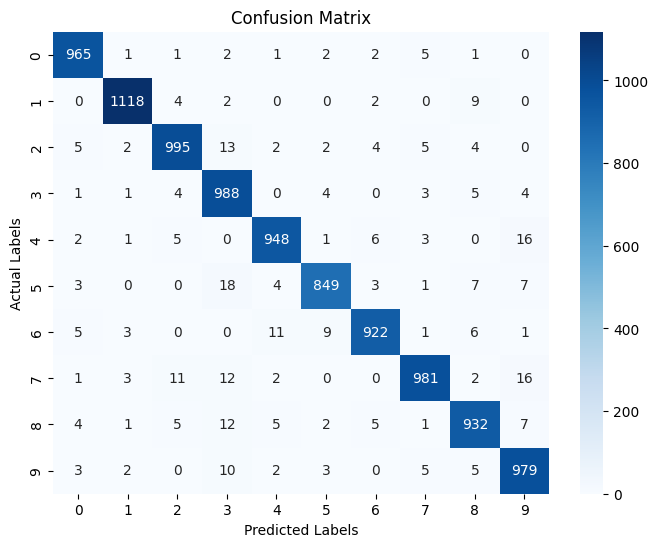

In [18]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, yn_test_pref_digits)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1', '2', '3', '4', '5','6','7','8','9'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()